In [10]:
import pandas as pd

# Define file path
file_path = r"D:\SQL\SQL Bunch internshala task"

customers_df = pd.read_csv(f"{file_path}\\customers.csv")
sales_df = pd.read_csv(f"{file_path}\\sales_data.csv")

# Display first few rows
print(customers_df.head())
print(sales_df.head())


   customer_id  total_spend  num_orders last_order_date
0         1001  8072.510788          14      2023-05-28
1         1002  4295.331083          39      2023-09-06
2         1003  9527.625896          10      2023-05-10
3         1004  4760.739090          46      2023-03-06
4         1005  6070.383831          45      2023-06-24
   order_id product_name category  order_date     revenue   region
0         1      Chicken     Meat  2023-12-05  443.177076     West
1         2         Eggs    Dairy  2023-09-30  263.980108  Central
2         3   Vegetables     Meat  2023-03-03   57.065403    South
3         4       Fruits    Dairy  2023-02-01  137.527289     East
4         5         Eggs   Bakery  2023-07-20  290.176776    South


In [24]:
# Convert 'order_date' to datetime
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'])

# Aggregate sales by month
sales_df['month'] = sales_df['order_date'].dt.to_period('M')
monthly_sales = sales_df.groupby('month').agg(
    total_revenue=('revenue', 'sum'),
    order_count=('order_id', 'count')
).reset_index()

# Check the aggregated sales data
print(monthly_sales.head())


     month  total_revenue  order_count
0  2023-01  102152.914293          403
1  2023-02  109304.165004          420
2  2023-03  103387.819191          403
3  2023-04  102659.676082          405
4  2023-05  103633.133311          420


In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = customers_df[['total_spend', 'num_orders']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit the K-Means model (3 clusters: high-value, frequent, occasional buyers)
kmeans = KMeans(n_clusters=3, random_state=42)
customers_df['segment'] = kmeans.fit_predict(scaled_features)

# Map segment labels to customer types
customers_df['segment'] = customers_df['segment'].map({
    0: 'High-Value Buyer',
    1: 'Frequent Buyer',
    2: 'Occasional Buyer'
})

# Check the segmented data
print(customers_df[['customer_id', 'total_spend', 'num_orders', 'segment']].head())


   customer_id  total_spend  num_orders           segment
0         1001  8072.510788          14  Occasional Buyer
1         1002  4295.331083          39  High-Value Buyer
2         1003  9527.625896          10  Occasional Buyer
3         1004  4760.739090          46  High-Value Buyer
4         1005  6070.383831          45  High-Value Buyer


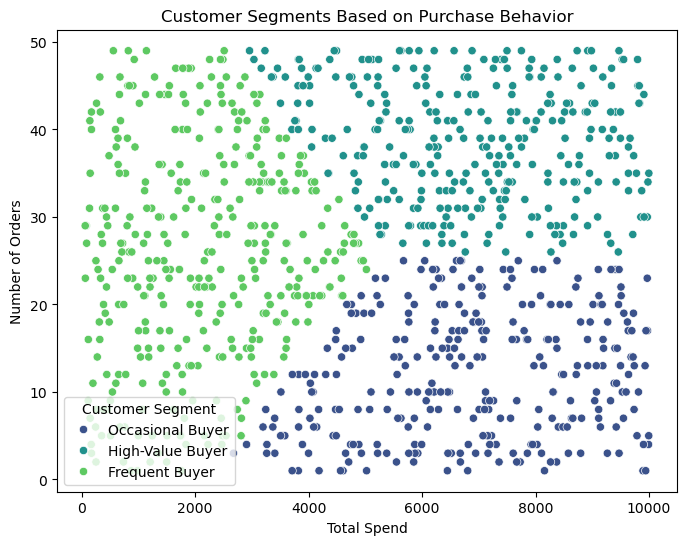

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for customer segmentation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customers_df, x='total_spend', y='num_orders', hue='segment', palette='viridis')
plt.title('Customer Segments Based on Purchase Behavior')
plt.xlabel('Total Spend')
plt.ylabel('Number of Orders')
plt.legend(title='Customer Segment')
plt.show()


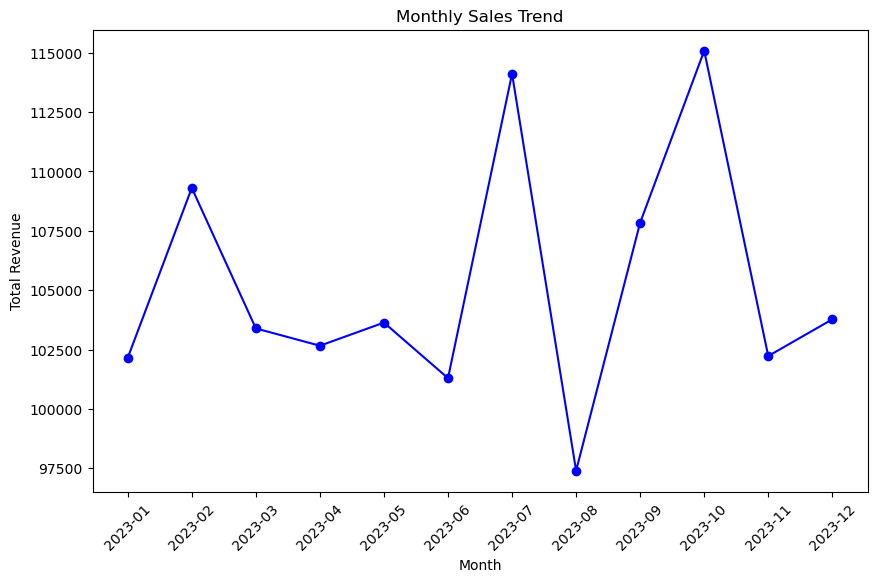

In [30]:
# Line plot to visualize monthly sales trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['month'].astype(str), monthly_sales['total_revenue'], marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


Business Implications & Insights
Customer Segmentation:

High-Value Buyers: These customers are likely to have a higher lifetime value and should be prioritized for loyalty programs or personalized offers.
Frequent Buyers: These customers are repeat customers, so providing discounts or rewards for their loyalty could increase their lifetime value.
Occasional Buyers: These customers are infrequent, so targeted promotions or remarketing strategies could help increase their purchase frequency.
Sales Trends:

By analyzing the monthly revenue trends, we can identify peak sales months, which could be tied to seasons, marketing campaigns, or product promotions.
The sales trend visualization will also show if any months experienced a dip, which could inform the need for promotional strategies during slow periods.